In [2]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/tensorflow_p36

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    py-xgboost-0.82            |   py36he1b5a44_0          70 KB  conda-forge
    xgboost-0.82               |   py36he1b5a44_0           9 KB  conda-forge
    libxgboost-0.82            |       he1b5a44_0         3.9 MB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

    _py-xgboost-mutex: 2

In [5]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [6]:
column_list_file = 'telco_train_column_list.txt'
train_file = 'telco_train.csv'
validation_file = 'telco_validation.csv'
test_file = 'telco_test.csv'

In [7]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [8]:
columns

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentM

In [9]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [10]:
df_train.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,1,0,4,1,1,80.35,307.40,...,1,0,0,1,0,0,0,0,1,0
1,0,1,1,0,1,56,1,0,94.80,5264.30,...,0,0,1,0,1,0,0,1,0,0
2,1,1,0,1,0,10,1,1,98.50,1037.75,...,0,0,1,1,0,0,0,0,1,0
3,0,1,0,1,1,4,1,0,24.10,73.10,...,0,1,0,0,1,0,0,1,0,0
4,1,1,0,0,0,12,1,1,106.70,1253.90,...,0,0,1,1,0,0,0,0,1,0


In [11]:
df_validation.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,36,1,1,95.00,3440.25,...,0,0,1,1,0,0,1,0,0,0
1,0,0,0,0,0,72,1,1,116.45,8013.55,...,0,0,1,0,0,1,1,0,0,0
2,0,1,0,1,1,35,1,1,69.15,2490.15,...,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,25,0,1,48.25,1293.80,...,0,0,1,1,0,0,0,0,1,0
4,0,1,0,1,1,25,1,0,54.30,1296.80,...,1,0,0,1,0,0,0,0,1,0


In [12]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [13]:
classifier = xgb.XGBClassifier(objective='binary:logistic')

In [14]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
classifier.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)], eval_metric=['logloss'])

[0]	validation_0-logloss:0.653845	validation_1-logloss:0.653591
[1]	validation_0-logloss:0.621708	validation_1-logloss:0.621235
[2]	validation_0-logloss:0.595315	validation_1-logloss:0.595105
[3]	validation_0-logloss:0.572546	validation_1-logloss:0.572309
[4]	validation_0-logloss:0.55345	validation_1-logloss:0.552921
[5]	validation_0-logloss:0.537024	validation_1-logloss:0.536673
[6]	validation_0-logloss:0.522372	validation_1-logloss:0.522537
[7]	validation_0-logloss:0.510116	validation_1-logloss:0.509934
[8]	validation_0-logloss:0.499412	validation_1-logloss:0.499932
[9]	validation_0-logloss:0.489676	validation_1-logloss:0.490708
[10]	validation_0-logloss:0.481378	validation_1-logloss:0.48248
[11]	validation_0-logloss:0.473031	validation_1-logloss:0.474526
[12]	validation_0-logloss:0.465767	validation_1-logloss:0.468785
[13]	validation_0-logloss:0.459655	validation_1-logloss:0.462765
[14]	validation_0-logloss:0.453985	validation_1-logloss:0.457731
[15]	validation_0-logloss:0.448918	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
eval_result = classifier.evals_result()

In [17]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [18]:
print(training_rounds)

range(0, 100)


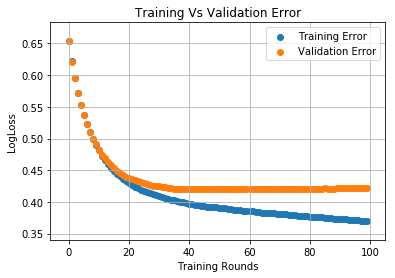

In [19]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Training Rounds')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()

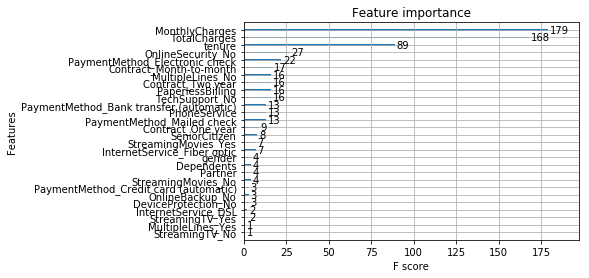

In [20]:
xgb.plot_importance(classifier)

In [21]:
import pickle

# save model to file
pickle.dump(classifier, open("xgboost_localmode.model.pickle", "wb"))

In [25]:
load model from file
loaded_model = pickle.load(open("xgboost_localmode.model.pickle", "rb"))

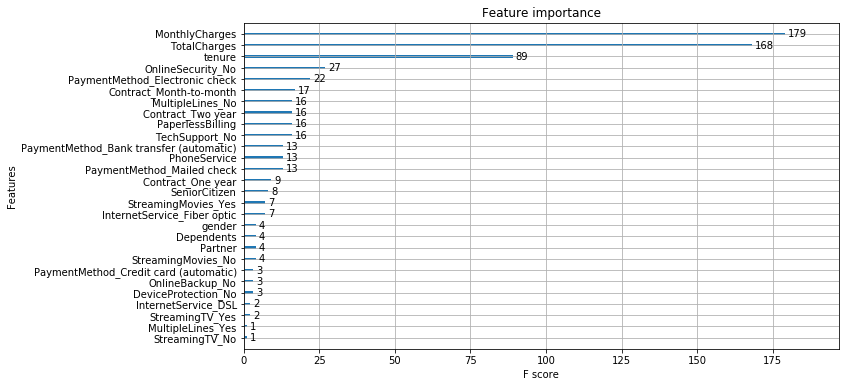

In [32]:
fig, ax = plt.subplots(1,1,figsize=(16 * 2/3, 9 * 2/3))
xgb.plot_importance(loaded_model, ax=ax)

In [39]:
X_validation.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,36,1,1,95.00,3440.25,0,...,0,0,1,1,0,0,1,0,0,0
1,0,0,0,0,72,1,1,116.45,8013.55,0,...,0,0,1,0,0,1,1,0,0,0
2,1,0,1,1,35,1,1,69.15,2490.15,0,...,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,25,0,1,48.25,1293.80,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,25,1,0,54.30,1296.80,1,...,1,0,0,1,0,0,0,0,1,0


In [45]:
y_validation_pred = classifier.predict(X_validation)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
y_validation_pred

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_true=y_validation, y_pred=y_validation_pred))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87      1105
          1       0.61      0.54      0.58       374

avg / total       0.79      0.80      0.79      1479



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png" />

In [51]:
df_test = pd.read_csv('telco_test.csv')

In [54]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,5,0,0,34.25,163.55,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,70,1,0,64.95,4551.50,0,...,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,4,1,1,74.80,321.90,1,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,19,1,1,84.75,1651.95,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,72,1,1,115.50,8425.15,0,...,0,0,1,0,0,1,0,0,1,0


In [55]:
df_test_truth = pd.read_csv('telco_test_truth.csv')

In [56]:
df_test_truth.head()

,Churn
0,0
1,0
2,1
3,0
4,0


In [57]:
df_test_pred = classifier.predict(df_test)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [58]:
df_test_pred

array([0, 0, 1, ..., 0, 1, 0])

In [61]:
df_test_truth['Churn'].values

array([0, 0, 1, ..., 0, 1, 0])

In [62]:
import sklearn.metrics as metrics
print(metrics.classification_report(
    y_true=df_test_truth['Churn'].values, y_pred=df_test_pred))

             precision    recall  f1-score   support

          0       0.86      0.89      0.87      1596
          1       0.61      0.55      0.58       517

avg / total       0.80      0.80      0.80      2113

